In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Number of predicted wins (W) is the target variable whereas others are featutes.

In [7]:
df.shape

(30, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No null values are present here and 2 types of data are present(int64 and float64).

In [10]:
df.duplicated().sum()

0

No duplicate values are present.

In [16]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [17]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


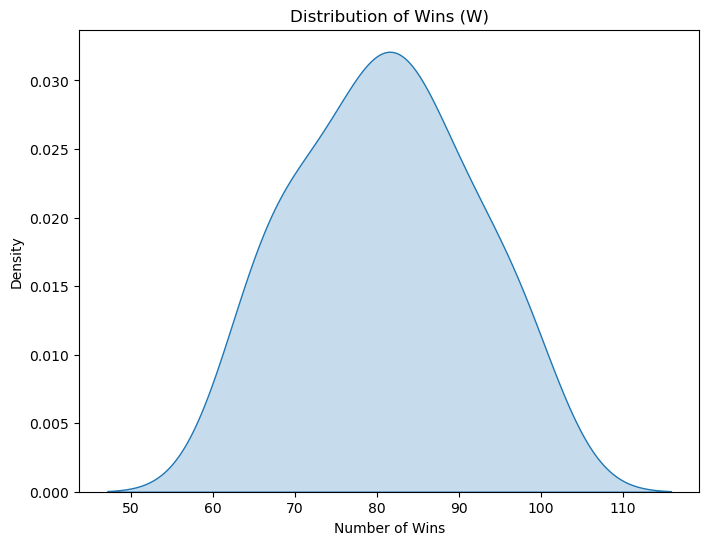

In [21]:
# Visualizing the distribution of the target variable (W)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['W'], fill=True)
plt.title('Distribution of Wins (W)')
plt.xlabel('Number of Wins')
plt.ylabel('Density')
plt.show()

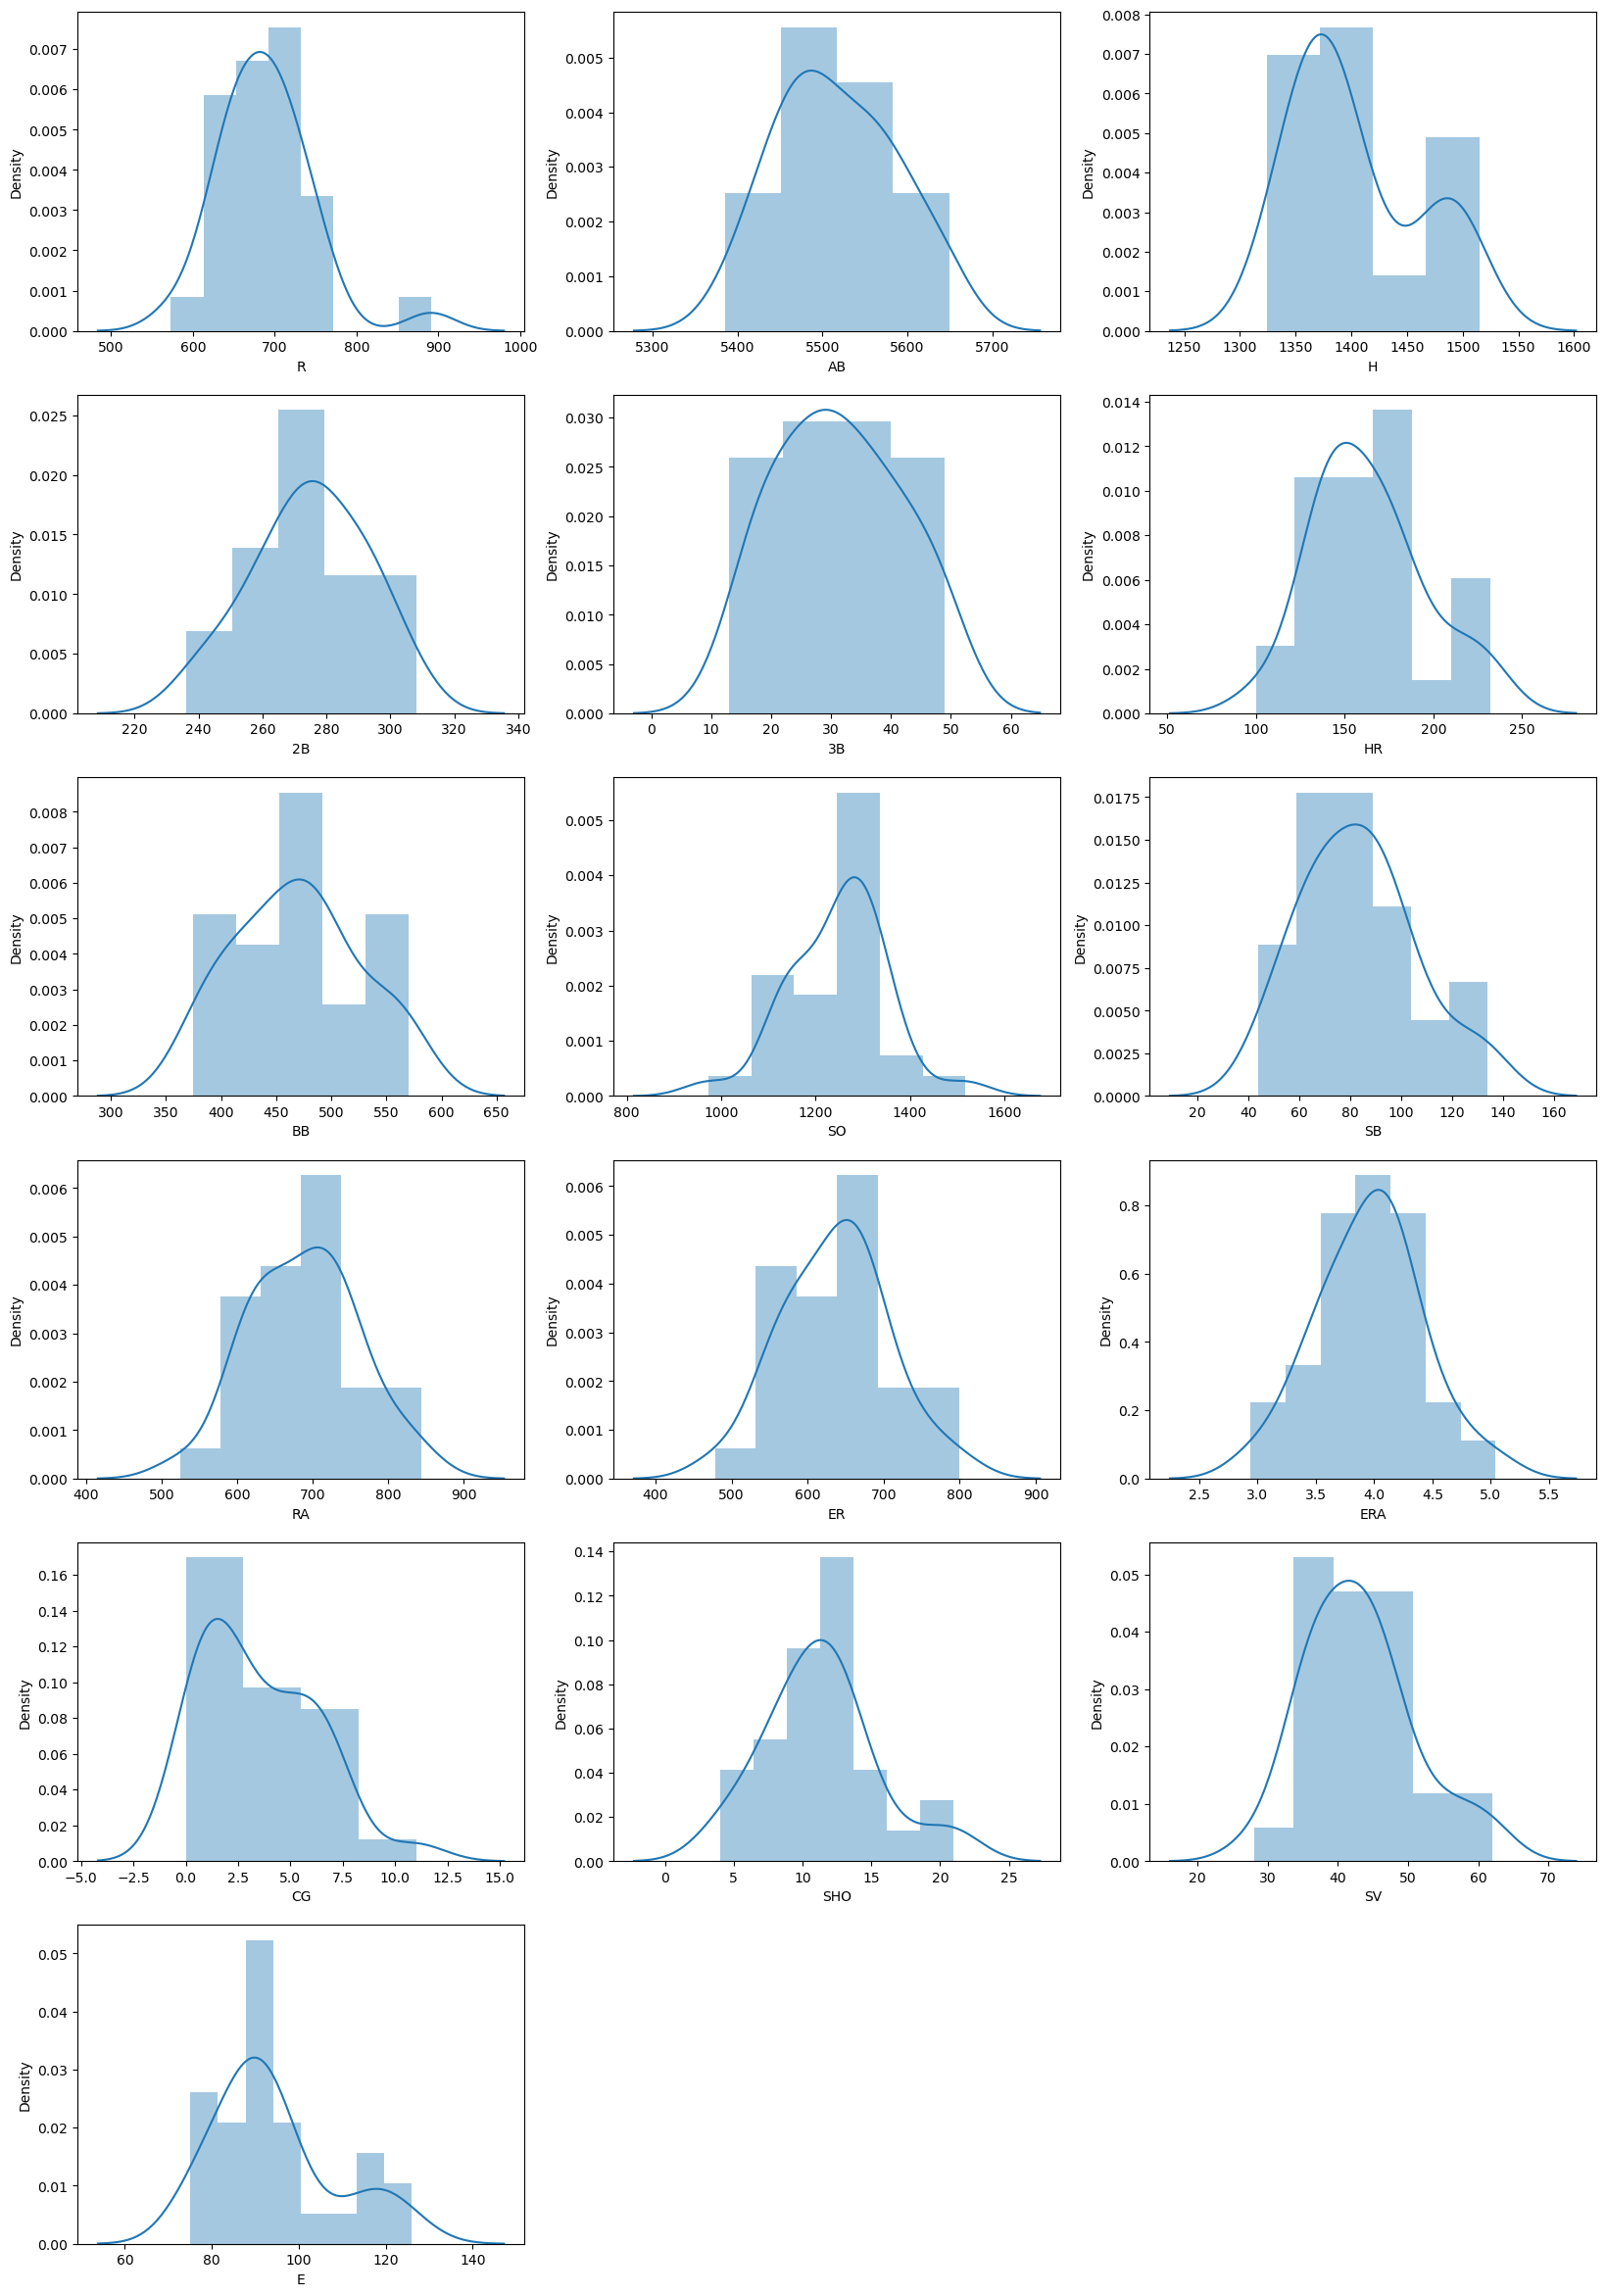

In [41]:
# univariate analysis of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()
   

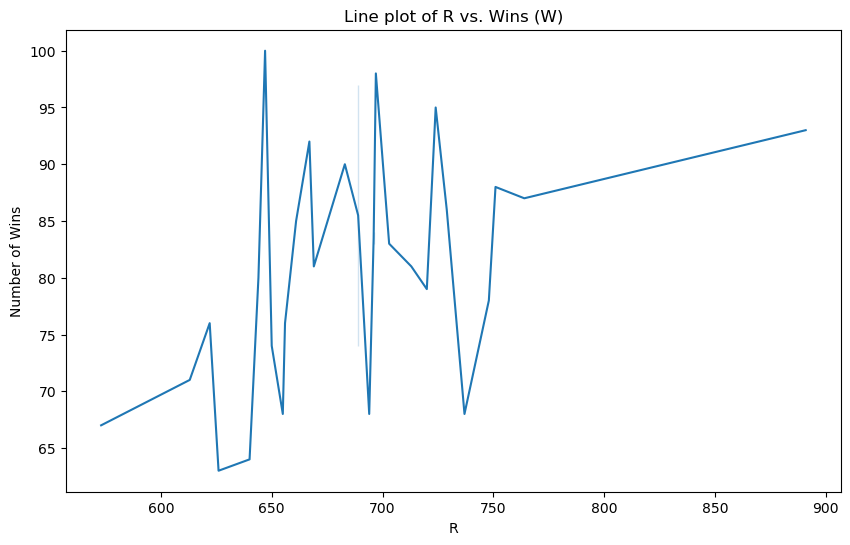

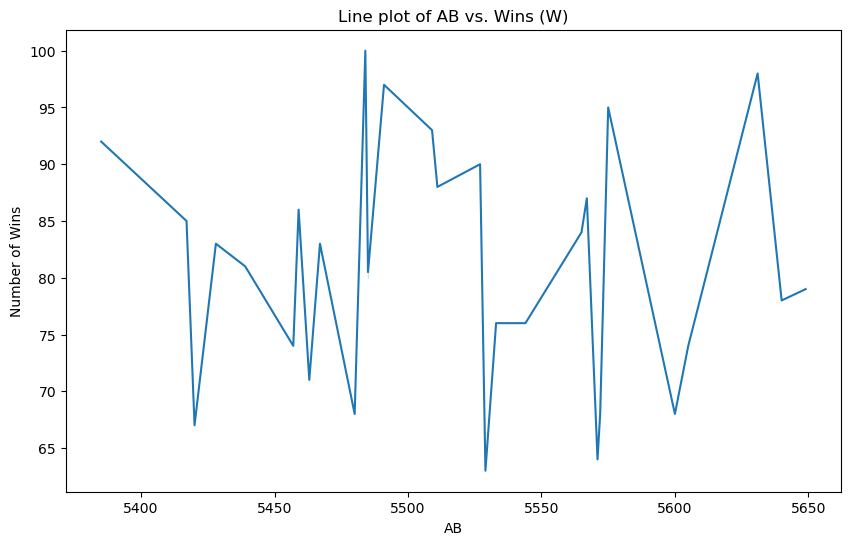

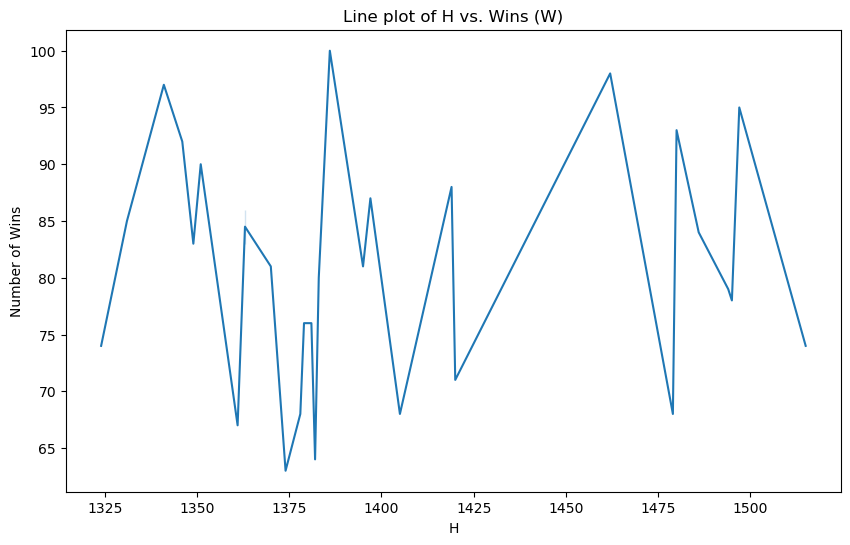

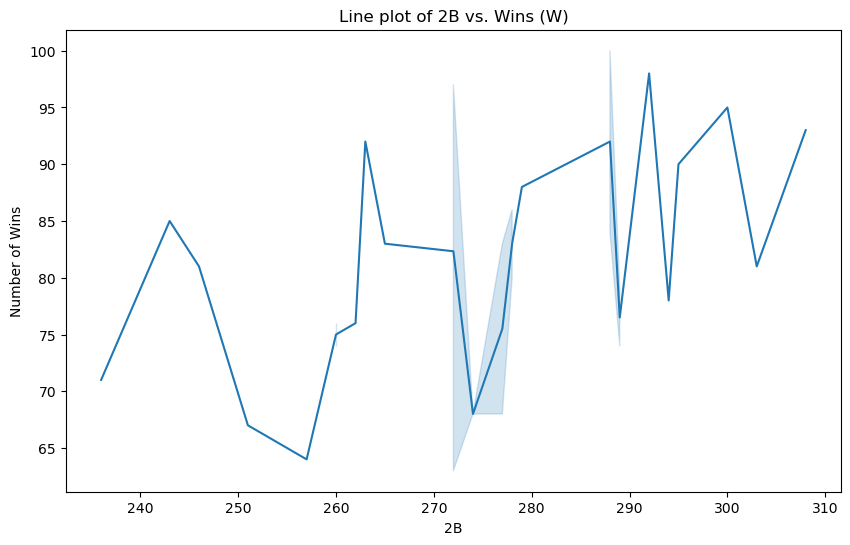

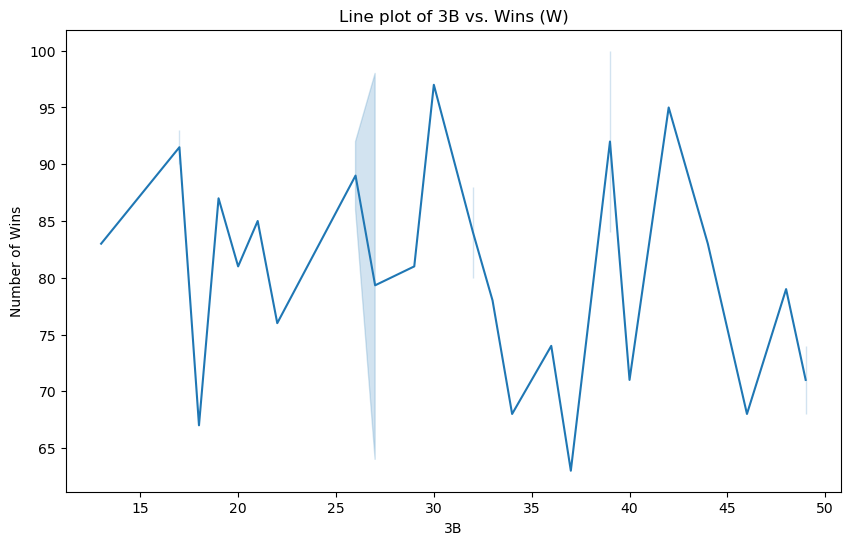

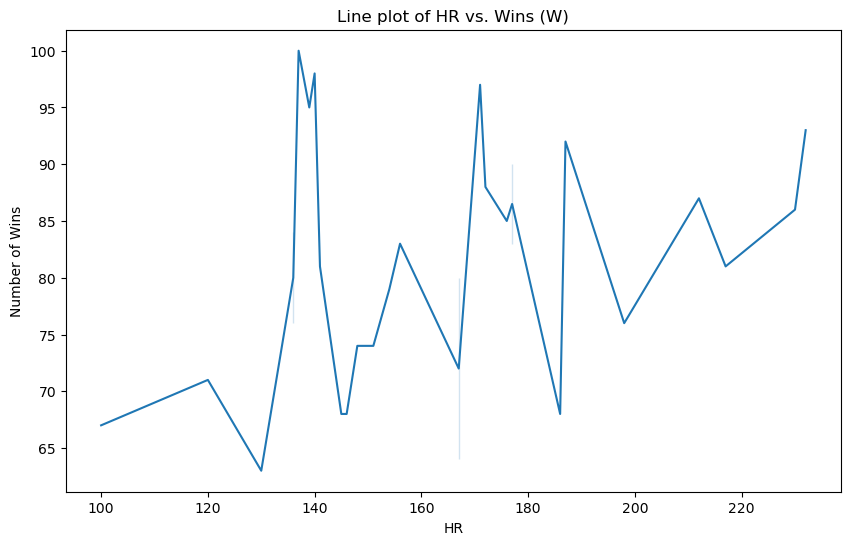

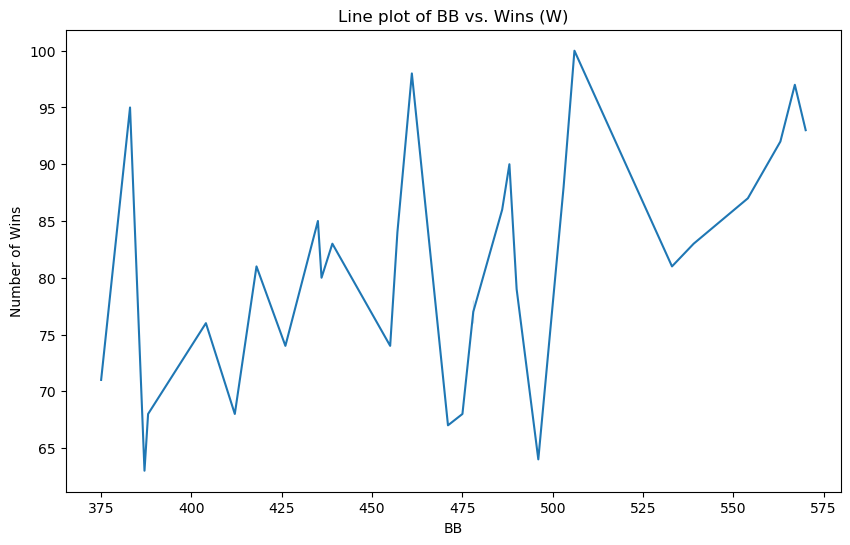

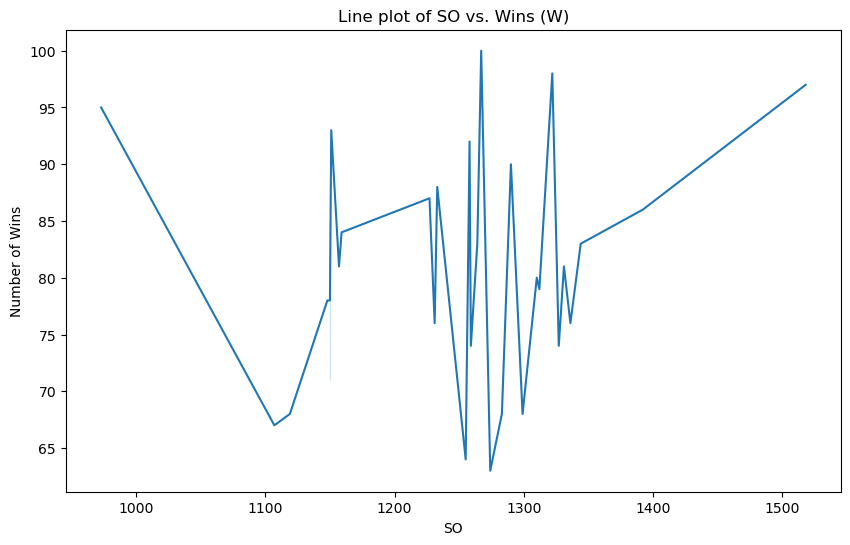

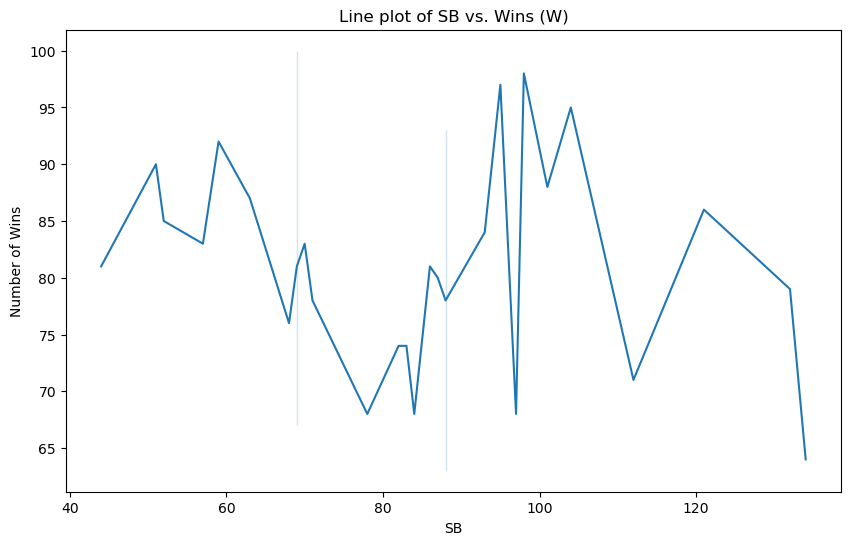

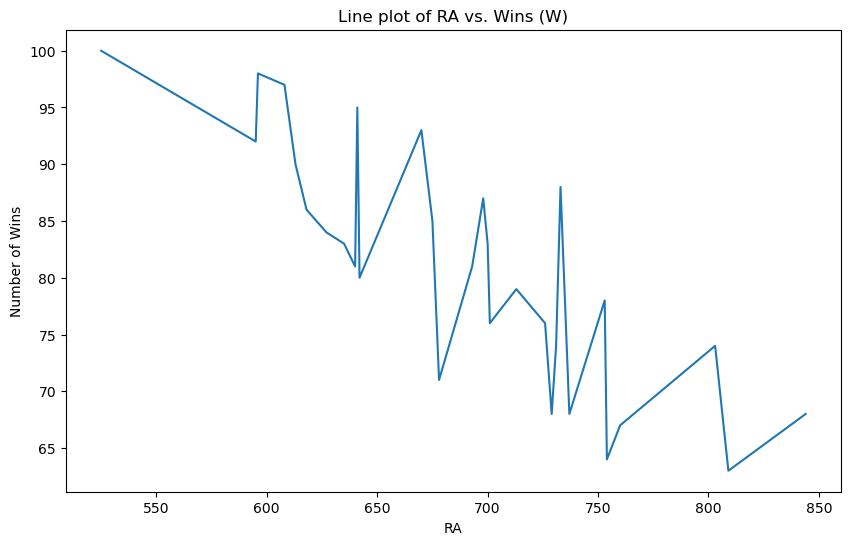

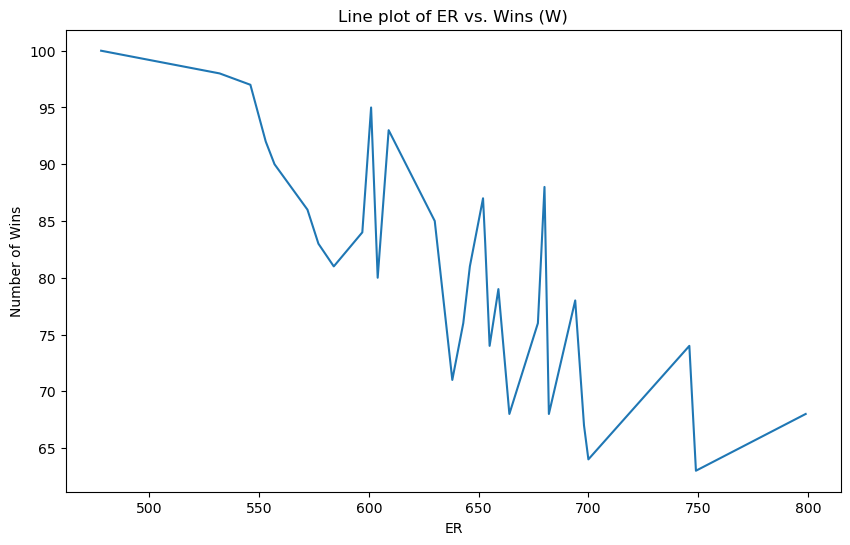

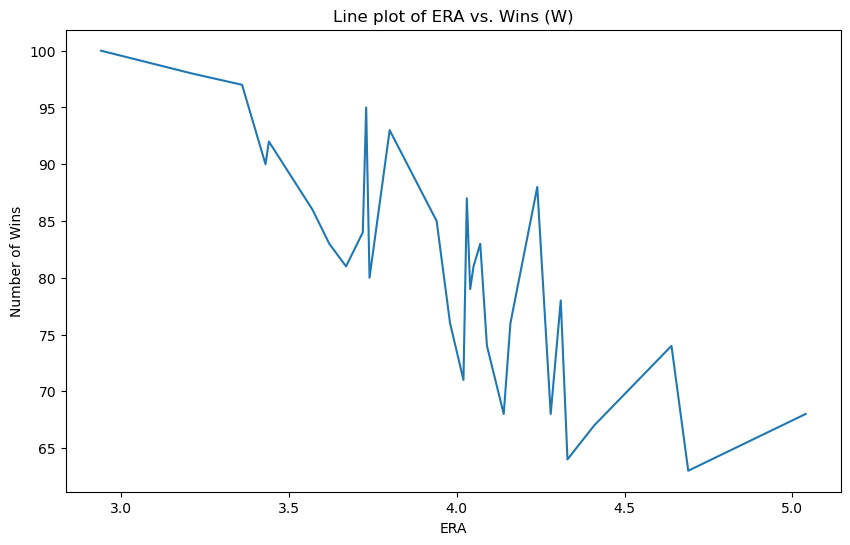

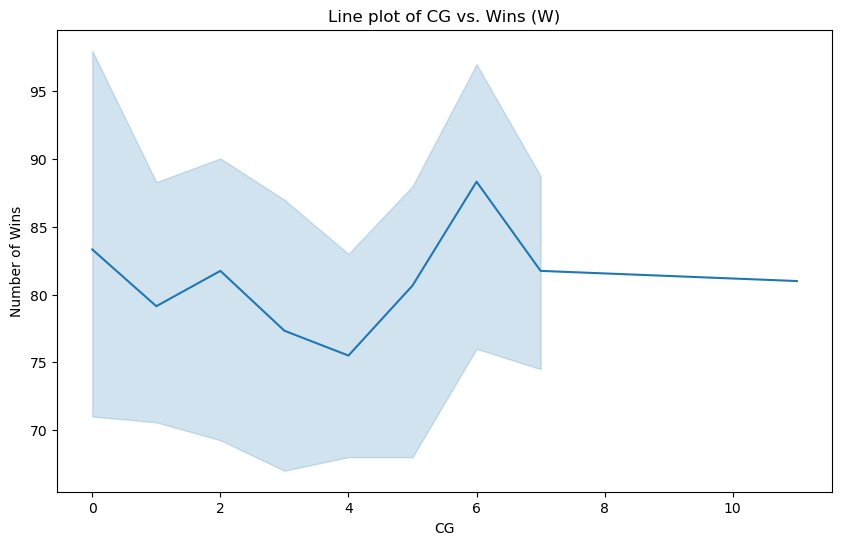

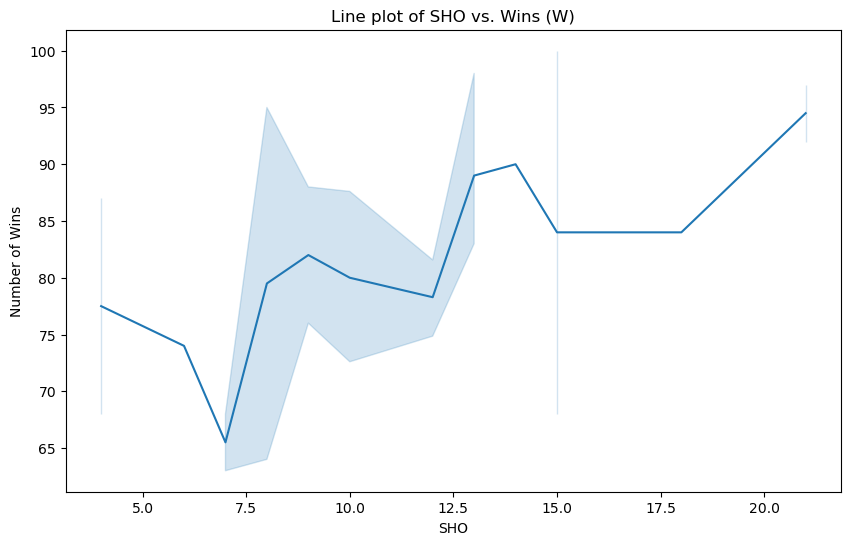

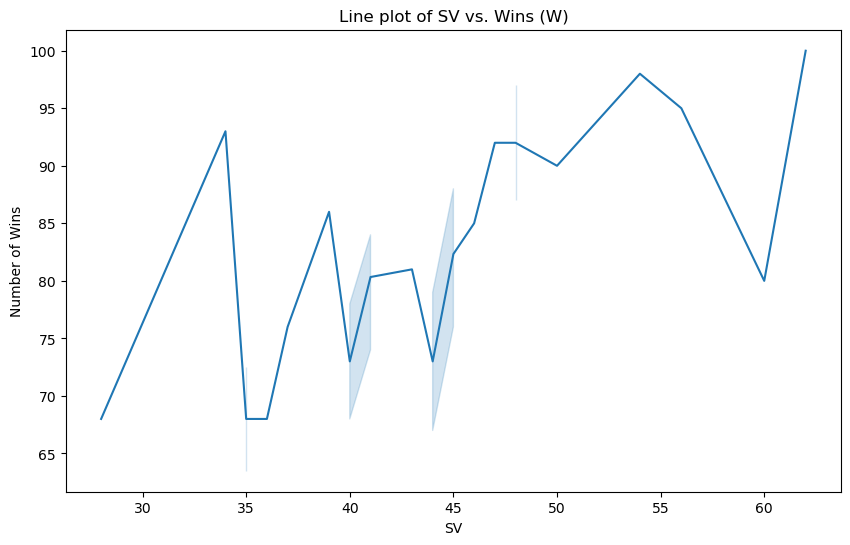

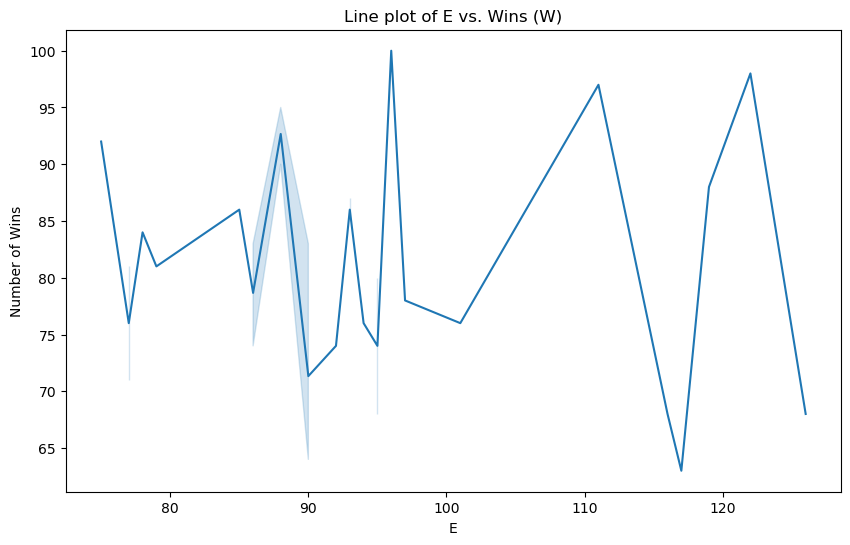

In [27]:
# Bivariate analysis: Line plot for relationships between numeric features and Wins (W)

features = df.columns[1:]

for feature in features:
  
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df[feature], y=df['W'])
    plt.title(f'Line plot of {feature} vs. Wins (W)')
    plt.xlabel(f'{feature}')
    plt.ylabel('Number of Wins')
    plt.show()

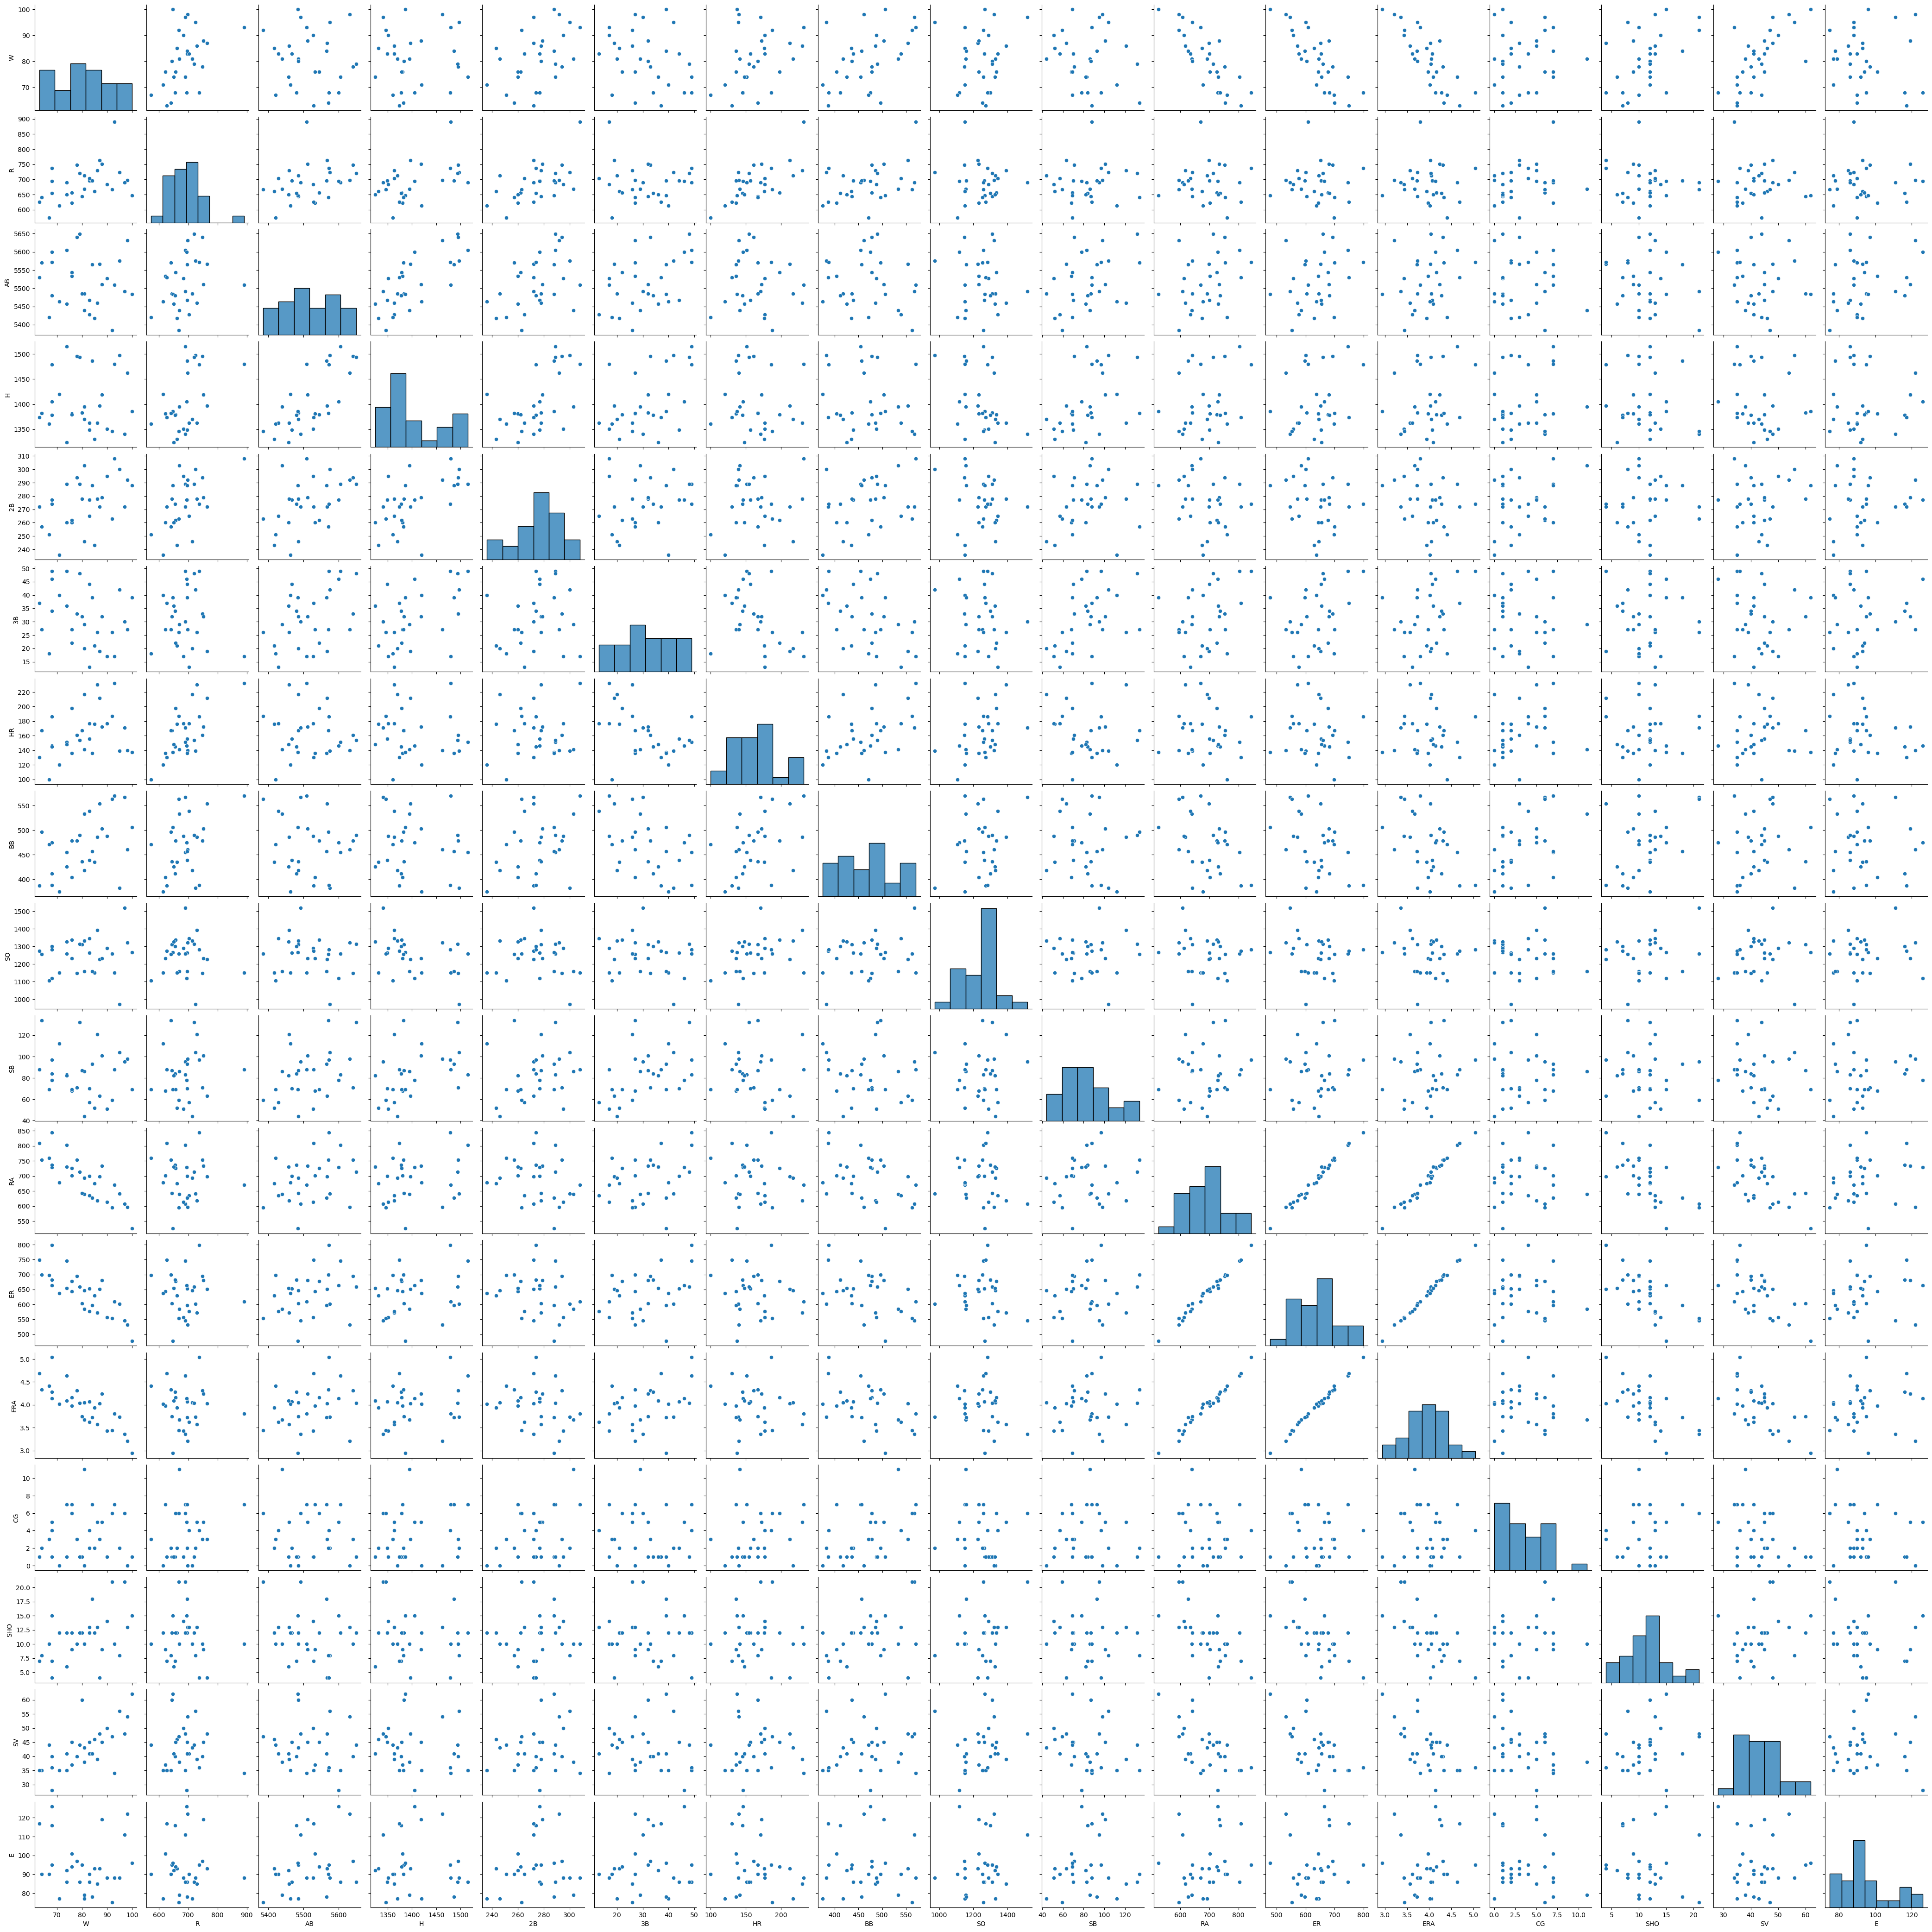

In [31]:
# Pairplot for relationships between features and the target variable

sns.pairplot(data=df,palette='Dark2')

In [35]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Statistical summary looks normal. We will check for outliers using boxplot if any.

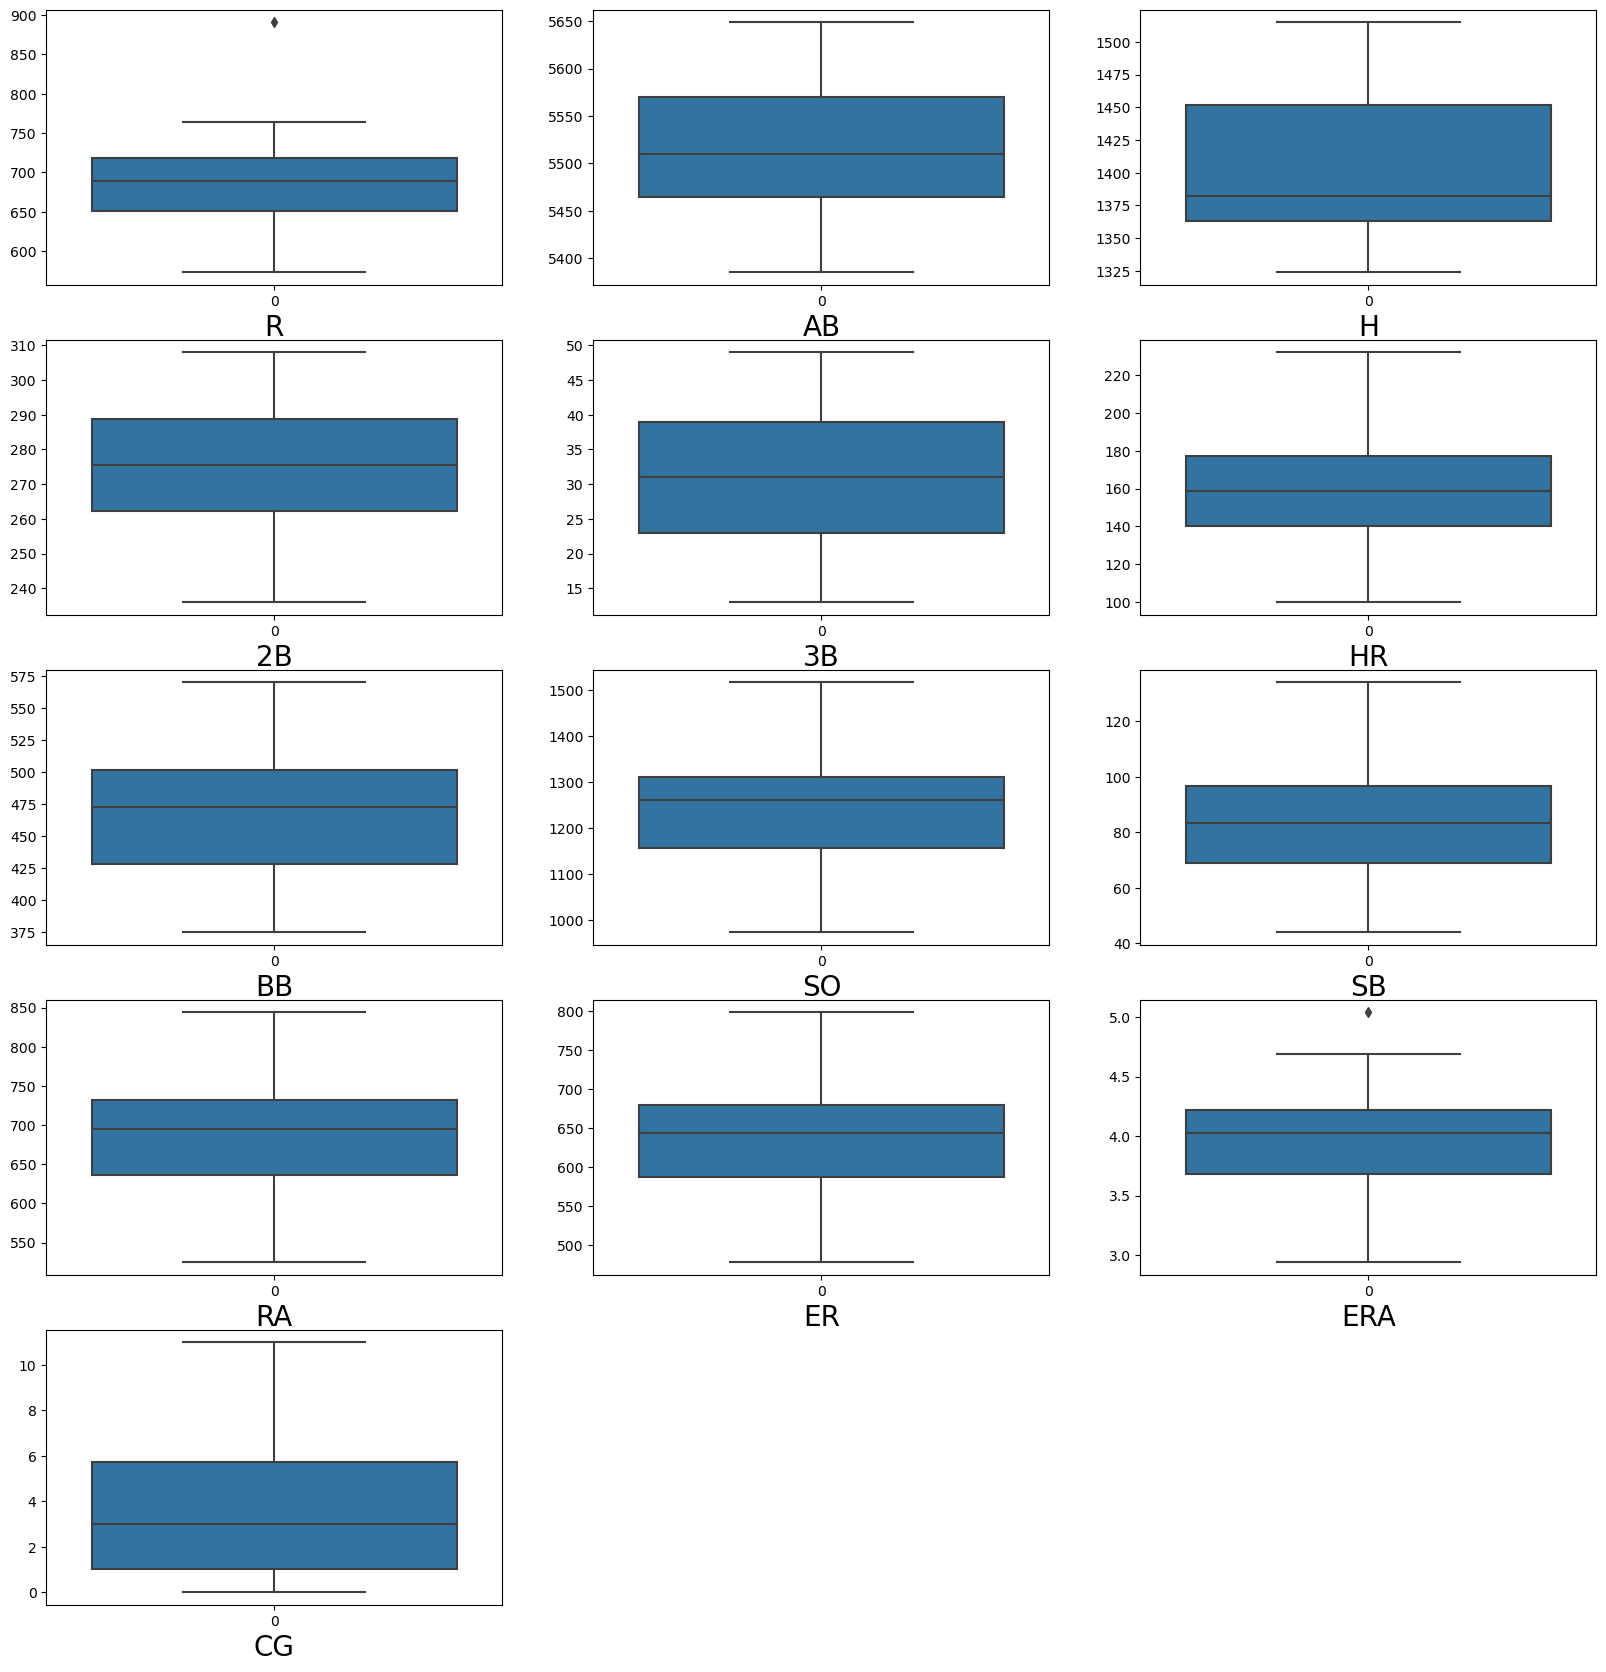

In [40]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in features:
    if graph<=13: 
        plt.subplot (6,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

As we can see there are outliers present in 'ERA' and "R" cloums which we will remove using zscore method.

In [44]:
df.shape

(30, 17)

In [43]:
from scipy.stats import zscore

out_col = df[['ERA','R']]
z = np.abs(zscore(out_col))
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [45]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(29, 17)

In [46]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 3.3333333333333335


 Its an acceptable loss percantage so we will move ahead with it. and now check for skewness.

In [49]:
df=df1

In [50]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

There are some skewness present in 'H','CG','SV' and 'E' columns as normal range is -0.5 to +0.5. now we will try to remove skewness using cuberoot method.

In [52]:
skewed_columns = ['H', 'CG', 'SV','E']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [53]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.013981
SHO    0.526943
SV     0.280963
E      0.671748
dtype: float64

We have removed skewness from 'SV' but still skewness is present in other 3 columns so we will try to remove it using different methods such as square root, log, exponential transformation etc

In [54]:
skewed_columns = ['H', 'CG', 'E']

for column in skewed_columns:
    df[column] = np.sqrt(df[column])

In [55]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.746079
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -2.084921
SHO    0.526943
SV     0.280963
E      0.627851
dtype: float64

In [56]:
skewed_columns = ['H', 'CG', 'E']

for column in skewed_columns:
    df[column] = np.exp(df[column])

In [57]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.771435
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.275397
SHO    0.526943
SV     0.280963
E      0.721016
dtype: float64

In [60]:
skewed_columns = ['H', 'CG', 'E']

for column in skewed_columns:
    df[column] = np.log1p(df[column])

In [61]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.740187
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -2.396816
SHO    0.526943
SV     0.280963
E      0.597566
dtype: float64

In [62]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
skewed_columns = ['H','CG','E']

for column in skewed_columns:
    df[column], _ = yeojohnson(df[column] + 1)


In [63]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.615896
SHO    0.526943
SV     0.280963
E      0.000000
dtype: float64

We have removed the skewness. now we will check for correlation.

<Axes: >

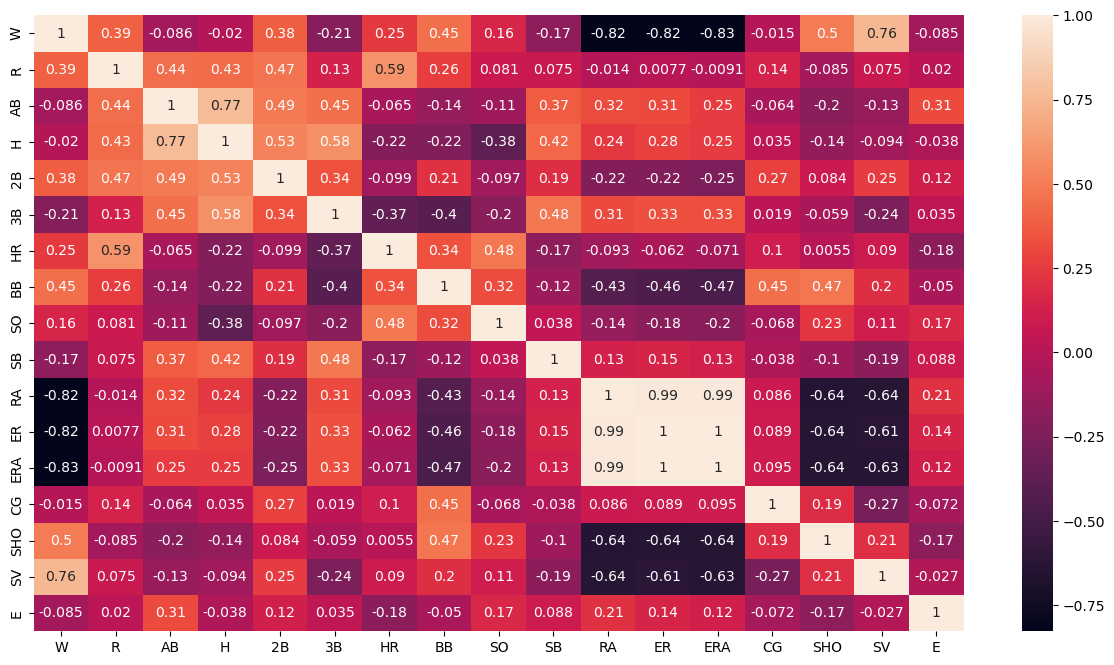

In [65]:
cor=df.corr()
fig= plt.figure(figsize=(15,8))
sns.heatmap(cor,annot = True)

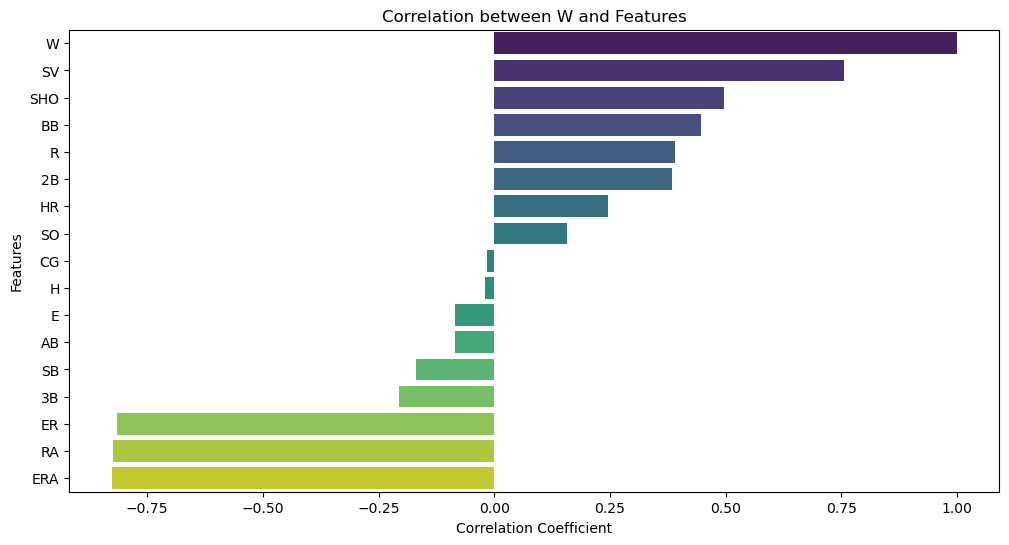

In [66]:
correlation_with_target = df.corr()['W'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title(f'Correlation between W and Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

SV (Save),ER, RA and ERA has a strong  correlation with  the number of wins.

In [69]:
#Seperating feautures and label
x = df.drop("W", axis=1) 
y=df["W"]

In [71]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.707943,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.178856,-0.813262,1.586882,-0.380753
1,0.331147,-0.702831,-0.953824,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.178856,0.159299,0.270050,-0.589090
2,-0.274666,-1.100253,-0.071682,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.844324,-0.326982,-0.684238,-1.214101
3,-1.329231,0.233951,-0.340160,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.149168,-0.570122,-0.829907,0.660930
4,0.174084,1.255894,2.007104,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.149168,0.159299,-1.129315,-0.589090
5,1.856900,0.716535,-0.033328,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.172775,-1.785822,0.648734,0.035920
6,0.712585,-0.447345,-0.547272,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-2.145275,-0.326982,0.008146,-1.422437
7,-0.835605,-0.447345,-0.301806,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.652018,0.159299,2.022638,0.035920
8,1.497899,1.752672,1.677259,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.172775,-0.326982,-0.400394,0.452594
9,1.565212,-0.078310,0.365553,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.716514,-0.570122,0.270050,1.702614


In [72]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

   Variable          VIF
0         R     7.083179
1        AB    18.018747
2         H     9.120257
3        2B     3.956015
4        3B     3.335941
5        HR     8.704359
6        BB     3.594619
7        SO     2.899657
8        SB     1.989040
9        RA   205.077083
10       ER  1893.064794
11      ERA  1469.071844
12       CG     2.905125
13      SHO     3.558108
14       SV     5.010724
15        E     2.261374


As we can see there are multicollinearity exists so we will remove it by deleting column with maximun vif value i.e. ER

In [73]:
x.drop('ER',inplace=True, axis=1)

In [74]:
# Again Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

   Variable         VIF
0         R    6.252899
1        AB    7.582411
2         H    8.719103
3        2B    3.633260
4        3B    3.304431
5        HR    7.644134
6        BB    3.594604
7        SO    2.892516
8        SB    1.841955
9        RA  149.355689
10      ERA  146.466220
11       CG    2.600792
12      SHO    3.448095
13       SV    2.435776
14        E    2.186450


RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
we will drop RA as well.

In [77]:
x.drop('RA', axis=1 , inplace = True)

In [78]:
# Again Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

   Variable       VIF
0         R  6.246498
1        AB  4.749365
2         H  7.351598
3        2B  3.617215
4        3B  3.270625
5        HR  6.493542
6        BB  3.211502
7        SO  2.320254
8        SB  1.788273
9       ERA  5.115470
10       CG  2.594560
11      SHO  3.223241
12       SV  2.335541
13        E  2.135017


We have removed multicollinearity completely.

In [82]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [80]:
#trying to find bestrandom state and accuracy
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')
print(f'Maximum Accuracy: {max_acc}')

Best Random State: 47
Maximum Accuracy: 0.9732539622283781


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state =best_RS)

Results for LinearRegression:
R2_score:  0.028449890092984154
R2_score on training Data: 93.813081479821
Mean Absolute Error:- 9.985902008153257
Mean Squared Error:- 131.05131482523524
Root Mean Squared Error:- 11.447764621323904
Cross-validation scores: [ 0.36607218 -0.85473542  0.63325639  0.54467201  0.6510613 ]
Mean Cross-validation score: 0.268065292023021
Difference between R2 score and cross-validation score is -23.96154019300368


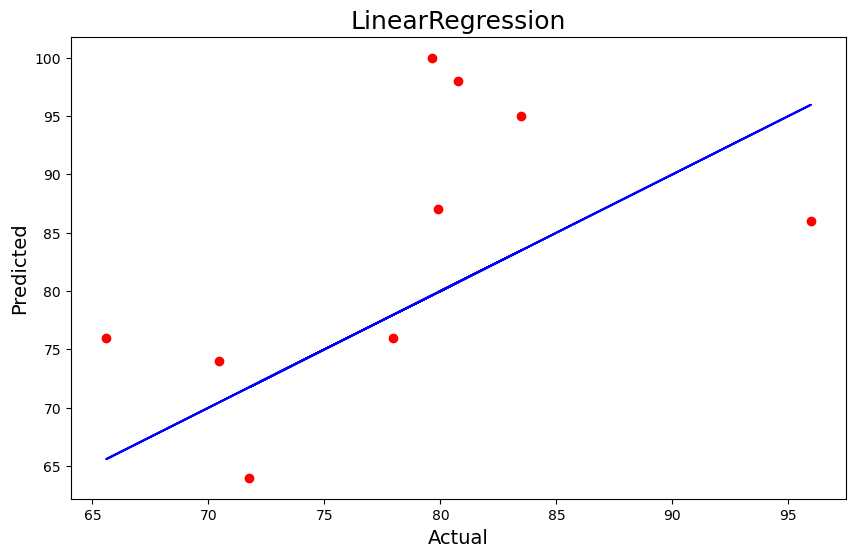



Results for RandomForestRegressor:
R2_score:  0.47177784184514004
R2_score on training Data: 92.74478181818182
Mean Absolute Error:- 7.050000000000001
Mean Squared Error:- 71.2513
Root Mean Squared Error:- 8.441048513069925
Cross-validation scores: [ 0.36838443 -5.79448816  0.47973191  0.40119902  0.86282577]
Mean Cross-validation score: -0.7364694063679026
Difference between R2 score and cross-validation score is 120.82472482130426


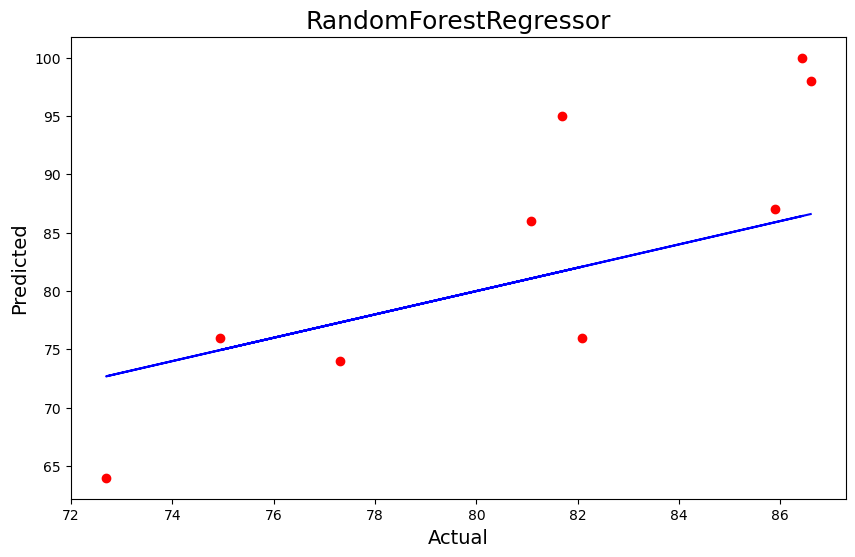



Results for DecisionTreeRegressor:
R2_score:  0.29736408566721584
R2_score on training Data: 100.0
Mean Absolute Error:- 7.888888888888889
Mean Squared Error:- 94.77777777777777
Root Mean Squared Error:- 9.735387911006821
Cross-validation scores: [ -1.46136364 -10.19736842   0.23379339   0.66557377   0.28950472]
Mean Cross-validation score: -2.0939720356114186
Difference between R2 score and cross-validation score is 239.13361212786347


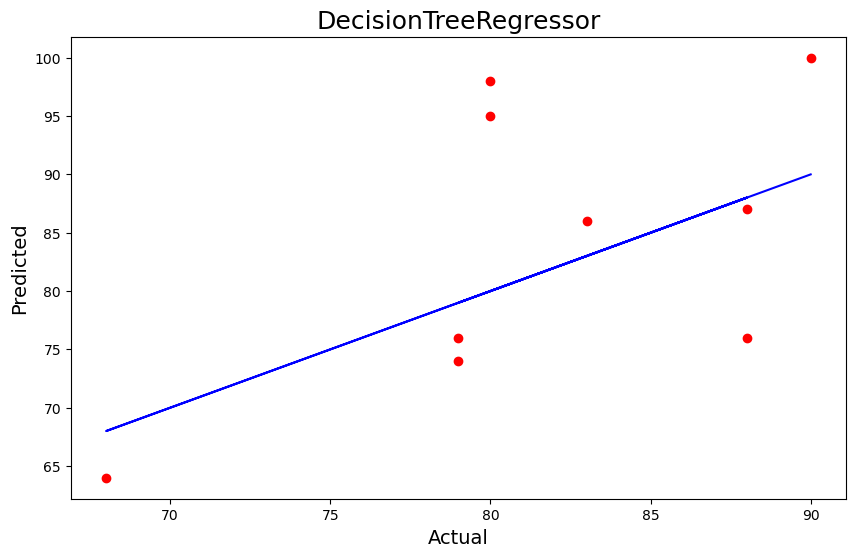



Results for KNeighborsRegressor:
R2_score:  0.2497528830313015
R2_score on training Data: 64.12121212121211
Mean Absolute Error:- 8.222222222222221
Mean Squared Error:- 101.19999999999999
Root Mean Squared Error:- 10.059821071967432
Cross-validation scores: [ 0.03059091 -2.15842105  0.40784609  0.27088525  0.65330189]
Mean Cross-validation score: -0.15915938426885515
Difference between R2 score and cross-validation score is 40.89122673001566


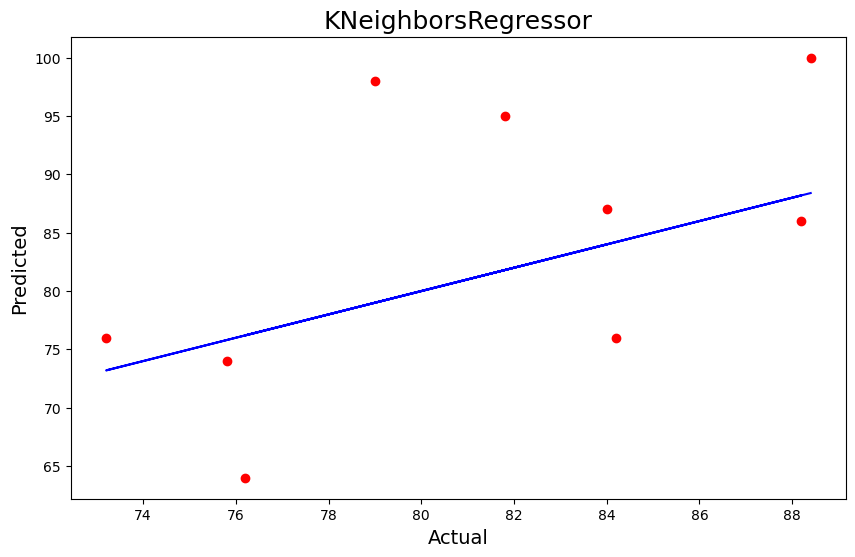



Results for Lasso:
R2_score:  0.6379019292788264
R2_score on training Data: 86.00050124880096
Mean Absolute Error:- 5.563395957187581
Mean Squared Error:- 48.843006428389415
Root Mean Squared Error:- 6.988777176902223
Cross-validation scores: [ 0.74387276 -0.80021774  0.7815277   0.78777727  0.87941643]
Mean Cross-validation score: 0.47847528555453345
Difference between R2 score and cross-validation score is 15.942664372429293


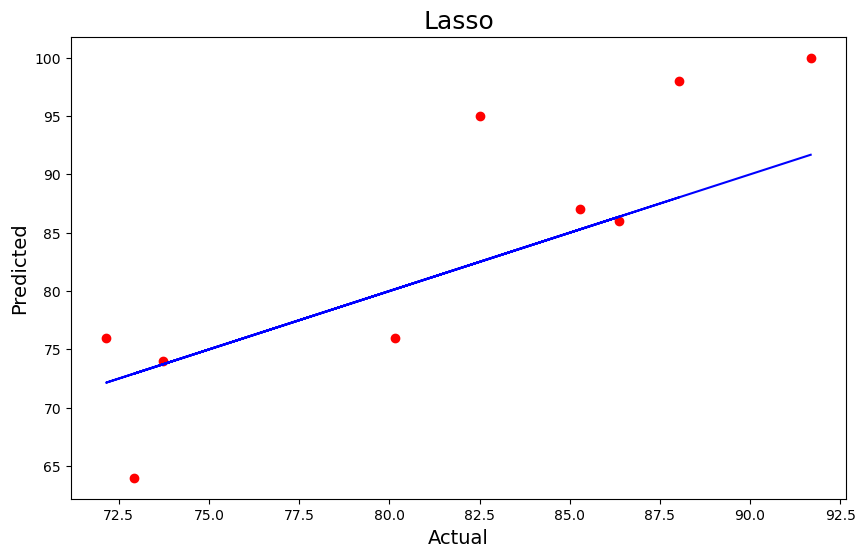



Results for Ridge:
R2_score:  0.4676029421694181
R2_score on training Data: 92.72200088865964
Mean Absolute Error:- 7.237134894860255
Mean Squared Error:- 71.81444757848072
Root Mean Squared Error:- 8.474340539444984
Cross-validation scores: [ 0.4515804  -1.01888396  0.66763242  0.89134106  0.82892518]
Mean Cross-validation score: 0.3641190221494612
Difference between R2 score and cross-validation score is 10.348392001995693


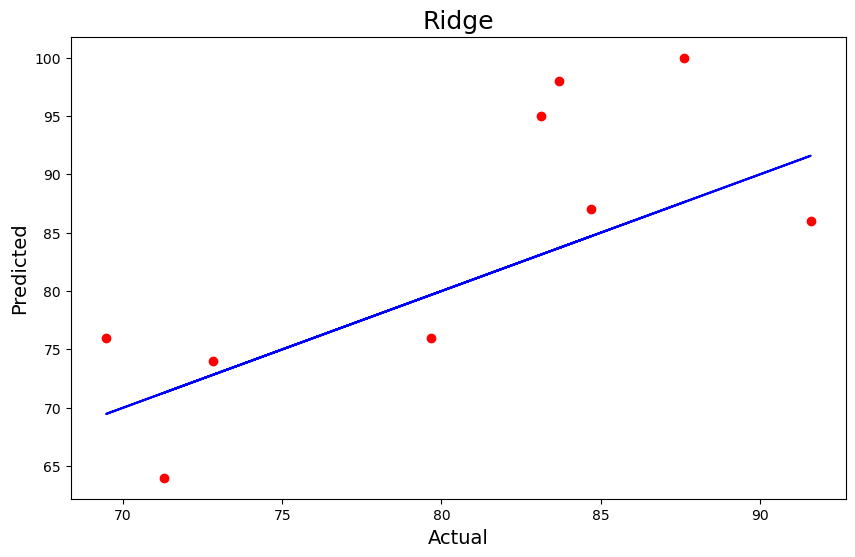

In [83]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="r2")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
    
    
    #plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x=y_pred, y=y_test, color='r')
    plt.plot(y_pred, y_pred, color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(model_name, fontsize=18)
    plt.show()
    
    print("\n" + "="*40 + "\n")

Lasso regression model is the best.

The reasons for choosing the Lasso model:

The R2 score for Lasso (0.6379) is the highest among all the models, indicates that the Lasso model explains a larger proportion of the variance in the target variable ('W') compared to other models.

The Lasso model has lower MAE, MSE, and RMSE values compared to other models. Lower values for these metrics means better predictive performance.

The cross-validation scores for Lasso are consistently high, suggests that the model generalizes well to unseen data. The mean cross-validation score (0.4785) is relatively high, indicates good performance.

The difference between the R2 score and cross-validation score for Lasso is reasonable (15.94). A smaller difference suggests that the model is not overfitting on the training data.

##### Hyper parameter tunning

In [84]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,500,5000],
    'random_state' : [47, 67,888]
}

In [86]:
# Initializing GridSearchCV
grid_search = GridSearchCV(Lasso(), params, cv=5, scoring='accuracy')


In [87]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 5000],
                         'random_state': [47, 67, 888]},
             scoring='accuracy')

In [88]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'alpha': 0.001, 'max_iter': 100, 'random_state': 47}


In [89]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.10589337236248653
Mean Absolute Error:- 9.550640363777834
Mean Squared Error:- 120.60504955021571
Root Mean Squared Error:- 10.982033033560576


In [112]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [113]:
# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='accuracy')


In [114]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [115]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [116]:
best_model4 = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model4.predict(x_test)

print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))



R2_score:  0.4584444810543661
Mean Absolute Error:- 7.108888888888886
Mean Squared Error:- 73.04982222222218
Root Mean Squared Error:- 8.546918873033848


In [95]:
param={'alpha': [1.0, .05,.4,2], 'fit_intercept': [True, False],
       'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
       'positive': [False, True],
       "random_state":[1,4,10,20]
      }
gscv=GridSearchCV(Ridge(), param, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [96]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [97]:
Model=Ridge (alpha= 2, fit_intercept= True, positive= True, random_state= 1,solver= 'auto')

In [98]:
Model.fit(x_train,y_train) 
pred=Model.predict(x_test)
print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.3996250572909287
Mean Absolute Error:- 7.546444216906181
Mean Squared Error:- 80.98390893875695
Root Mean Squared Error:- 8.999106007751934


In [99]:
params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [100]:
gscv=GridSearchCV(DecisionTreeRegressor(), params, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [101]:
gscv.best_params_

{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [103]:
Model= DecisionTreeRegressor(max_depth=50, min_samples_leaf= 1, min_samples_split= 5)

In [104]:
Model.fit(x_train,y_train) 
pred=Model.predict(x_test)
print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.3316858868753435
Mean Absolute Error:- 8.222222222222221
Mean Squared Error:- 90.14814814814811
Root Mean Squared Error:- 9.494637862928112


In [105]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]  
}

In [108]:
gscv=GridSearchCV(KNN(), params, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [109]:
gscv.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

In [110]:
Model= KNN(n_neighbors= 7, p= 2, weights= 'distance')

In [111]:
Model.fit(x_train,y_train) 
pred=Model.predict(x_test)
print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.27610509773004577
Mean Absolute Error:- 7.972702027806765
Mean Squared Error:- 97.64537903952494
Root Mean Squared Error:- 9.881567640790855


After Hyper paramenter tunning out of all the models we can say that out best model is Random forest regression.

In [118]:
import joblib
joblib.dump(best_model4, "Baseball.pkl")

['Baseball.pkl']

In [119]:
# loading the saved model and getting the predictions
model=joblib.load("Grades.pkl")

# Prediction
prediction = best_model4.predict(x_test)
prediction

array([85.7 , 73.4 , 77.14, 80.04, 80.02, 70.44, 82.48, 85.58, 84.42])

In [120]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,85.70,100
1,73.40,76
2,77.14,74
3,80.04,86
4,80.02,76
5,70.44,64
6,82.48,95
7,85.58,87
8,84.42,98
